# SRW Simulations

This section is based on the **TES** and **ARI** beamline examples.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.

## Run "Beamline" SRW simulations

In this example, we scan the horizontal size of the aperture and collect the resulting averaged intensities and corresponding 2D intensity distributions from the "Watchpoint" report on the "Beamline" page of the Sirepo/SRW app.

Start ``ipython`` and run the following where ``sim_id`` is the UID for the simulation we are working with:



Transient Scan ID: 1     Time: 2023-08-19 16:57:34
Persistent Unique Scan ID: '6126f53f-40fc-49e4-9fa7-c3621d03e520'
New stream: 'primary'
+-----------+------------+-------------------------+-------------+------------+
|   seq_num |       time | aperture_horizontalSize | w9_duration |    w9_flux |
+-----------+------------+-------------------------+-------------+------------+


|         1 | 16:58:03.0 |                   0.000 |      28.225 |      0.000 |


|         2 | 16:58:30.5 |                   0.400 |      27.304 | 18526369890570088.000 |


|         3 | 16:58:58.0 |                   0.800 |      27.310 | 875180761407870848.000 |


|         4 | 16:59:25.5 |                   1.200 |      27.312 | 2835215383578687488.000 |


|         5 | 16:59:53.1 |                   1.600 |      27.319 | 6790620360429310976.000 |


|         6 | 17:00:20.6 |                   2.000 |      27.397 | 13986015521742526464.000 |


+-----------+------------+-------------------------+-------------+------------+
generator scan ['6126f53f'] (scan num: 1)





                                 time  aperture_horizontalSize  \
seq_num                                                          
1       2023-08-19 16:58:03.096503496                      0.0   
2       2023-08-19 16:58:30.599914789                      0.4   
3       2023-08-19 16:58:58.099466085                      0.8   
4       2023-08-19 16:59:25.595795631                      1.2   
5       2023-08-19 16:59:53.104821920                      1.6   
6       2023-08-19 17:00:20.696308136                      2.0   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   
6        {"models": {"arbitraryMagFie

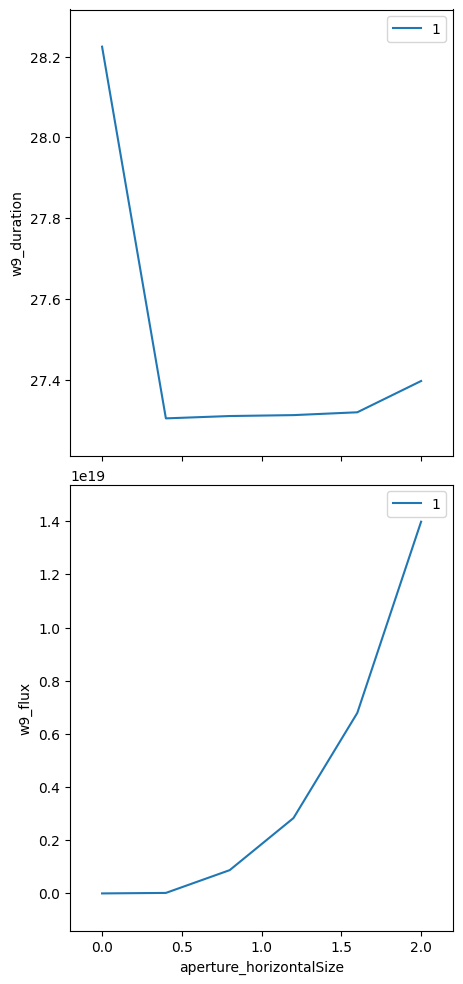

In [1]:
from sirepo_bluesky import prepare_re_env

%run -i $prepare_re_env.__file__

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", sim_id="00000002")
classes, objects = create_classes(connection=connection)
globals().update(**objects)

aperture.horizontalSize.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(bp.scan([w9], aperture.horizontalSize, 0, 2, 6))

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = np.array(list(hdr.data("w9_image")))

Data shape: (6, 42, 960)


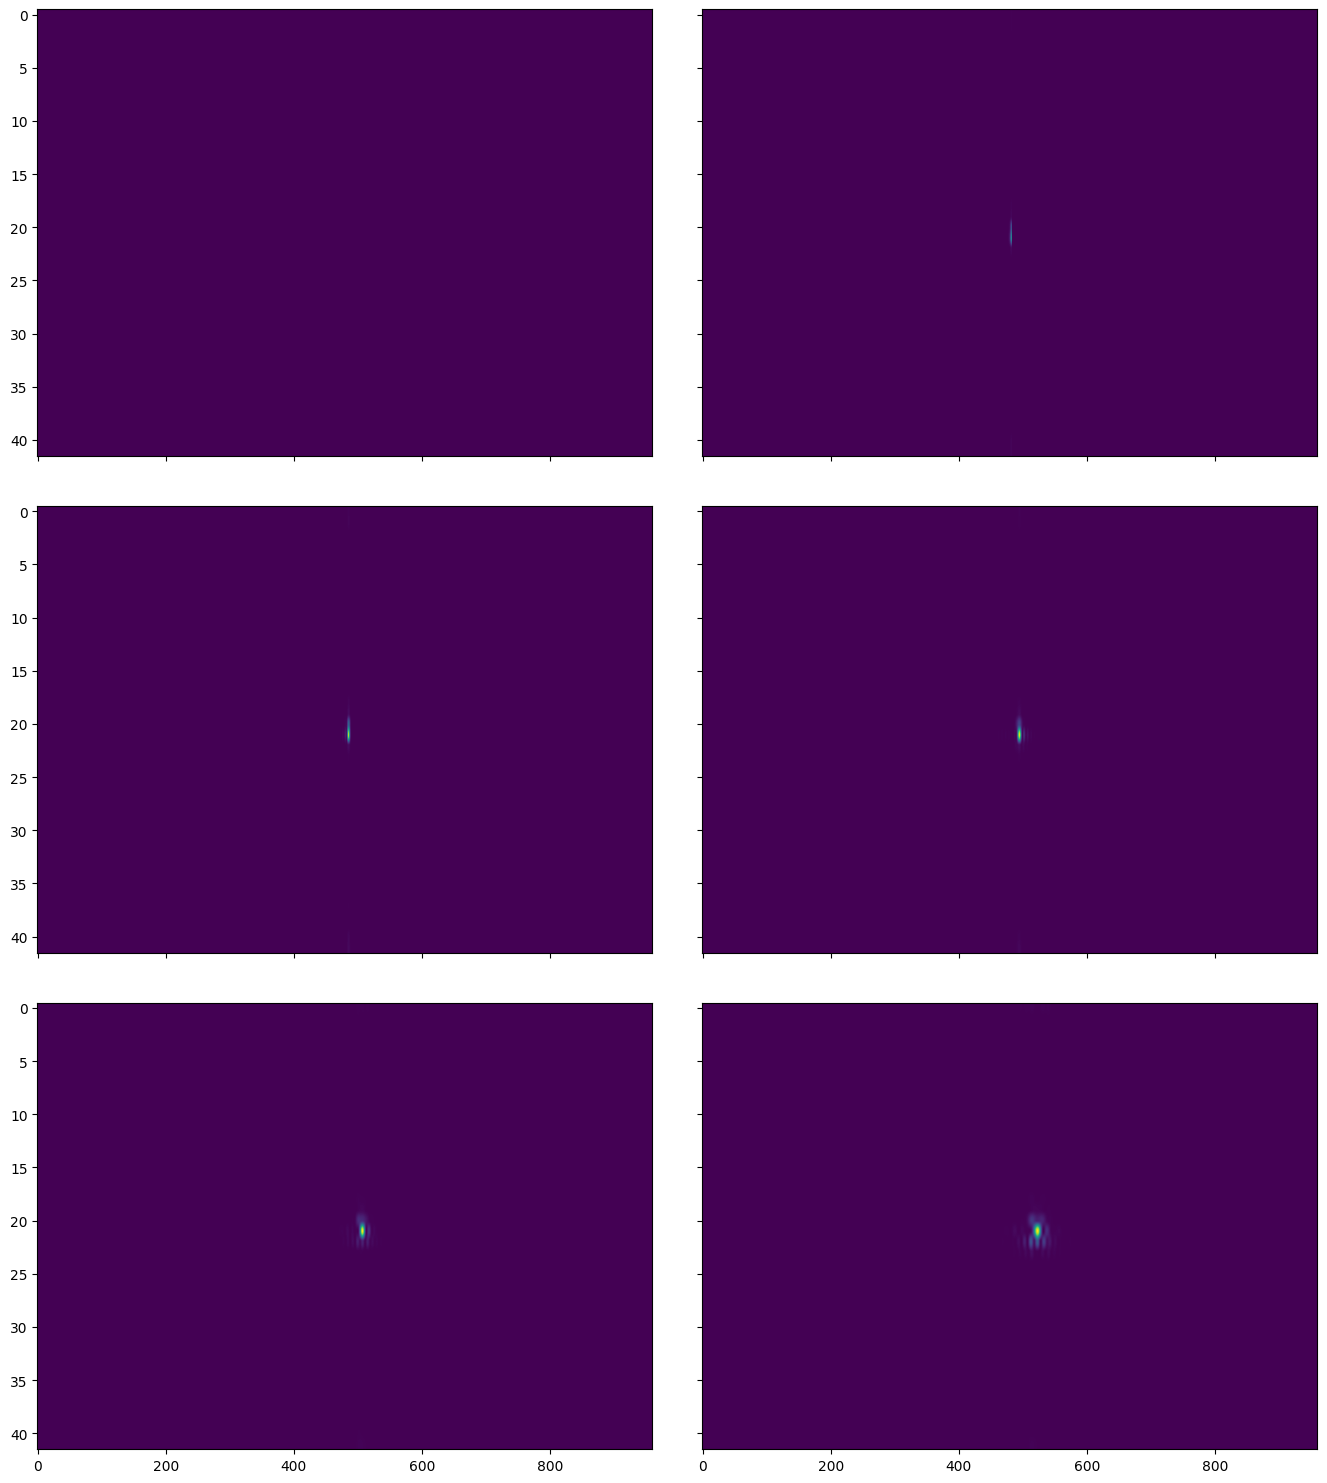

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid

print(f"Data shape: {w9_image.shape}")
num_frames = w9_image.shape[0]
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(
    fig,
    (1, 2, ncols, nrows),
    nrows_ncols=(nrows, ncols),
    axes_pad=0.5,
    aspect=False,
)

for ax, im in zip(grid, w9_image[:, ...]):
    ax.imshow(im, aspect="auto")

## SRW Propagation as Ophyd Objects

This example repeats the above simulation in "Optical Elements as Ophyd Objects", but instead scans the horizontal and vertical resolution modification factors of the "Final Post Propagation" on the "Beamline" page of the Sirepo/SRW app.

**Hint**: See the ["SRW Propagation Parameters" wiki page](https://github.com/radiasoft/sirepo/wiki/SRW-Propagation-Parameters) for a list of available propagation parameters.



Transient Scan ID: 1     Time: 2023-08-19 17:00:23
Persistent Unique Scan ID: 'eea68bd8-ccfa-4974-be88-8662e0ff8a94'
New stream: 'primary'
+-----------+------------+---------------------------+---------------------------+-------------+------------+
|   seq_num |       time | post_propagation_hres_mod | post_propagation_vres_mod | w9_duration |    w9_flux |
+-----------+------------+---------------------------+---------------------------+-------------+------------+


|         1 | 17:00:50.1 |                     0.100 |                     0.100 |      26.304 | 1073586585333243904.000 |


|         2 | 17:01:17.5 |                     0.250 |                     0.250 |      27.308 | 9175272414847424512.000 |


|         3 | 17:01:44.0 |                     0.500 |                     0.500 |      26.324 | 34882168960161890304.000 |


|         4 | 17:02:11.6 |                     1.000 |                     1.000 |      27.366 | 135695489249894498304.000 |


|         5 | 17:02:39.6 |                     2.000 |                     2.000 |      27.651 | 548121885006057046016.000 |


|         6 | 17:03:12.8 |                     5.000 |                     5.000 |      31.660 | 3411478534323461160960.000 |


+-----------+------------+---------------------------+---------------------------+-------------+------------+
generator list_scan ['eea68bd8'] (scan num: 1)





                                 time  \
seq_num                                 
1       2023-08-19 17:00:50.134056330   
2       2023-08-19 17:01:17.594286442   
3       2023-08-19 17:01:44.090910196   
4       2023-08-19 17:02:11.650974751   
5       2023-08-19 17:02:39.667309046   
6       2023-08-19 17:03:12.854381323   

                                       w9_sirepo_data_json  \
seq_num                                                      
1        {"models": {"arbitraryMagField": {"interpolati...   
2        {"models": {"arbitraryMagField": {"interpolati...   
3        {"models": {"arbitraryMagField": {"interpolati...   
4        {"models": {"arbitraryMagField": {"interpolati...   
5        {"models": {"arbitraryMagField": {"interpolati...   
6        {"models": {"arbitraryMagField": {"interpolati...   

                                       w9_sirepo_data_hash  w9_duration  \
seq_num                                                                   
1        444ff37a841f1ea

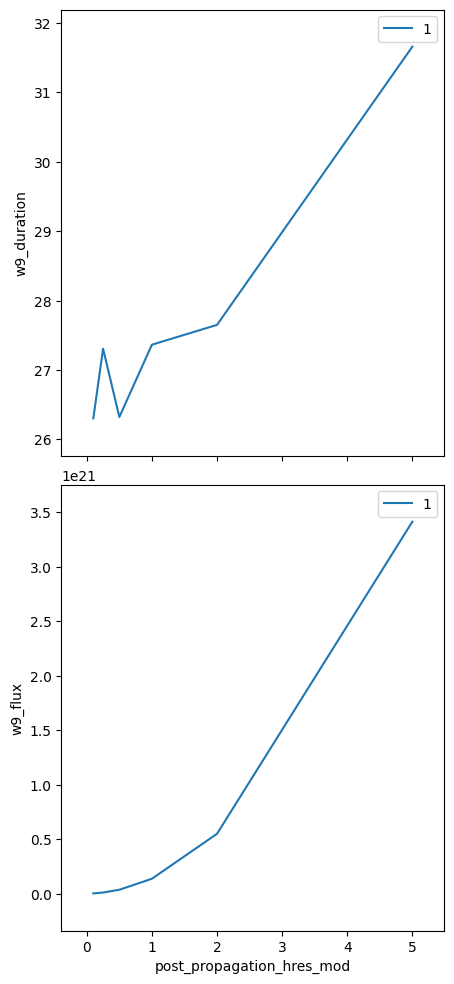

In [3]:
from sirepo_bluesky import prepare_re_env

%run -i $prepare_re_env.__file__

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", sim_id="00000002")
classes, objects = create_classes(connection=connection)
globals().update(**objects)

post_propagation.hres_mod.kind = "hinted"
post_propagation.vres_mod.kind = "hinted"
w9.duration.kind = "hinted"

(uid,) = RE(
    bp.list_scan(
        [w9],
        post_propagation.hres_mod,
        [0.1, 0.25, 0.5, 1, 2, 5],
        post_propagation.vres_mod,
        [0.1, 0.25, 0.5, 1, 2, 5],
    )
)

hdr = db[uid]
tbl = hdr.table(fill=True)
print(tbl)

w9_image = []
for im in list(hdr.data("w9_image")):
    w9_image.append(im)

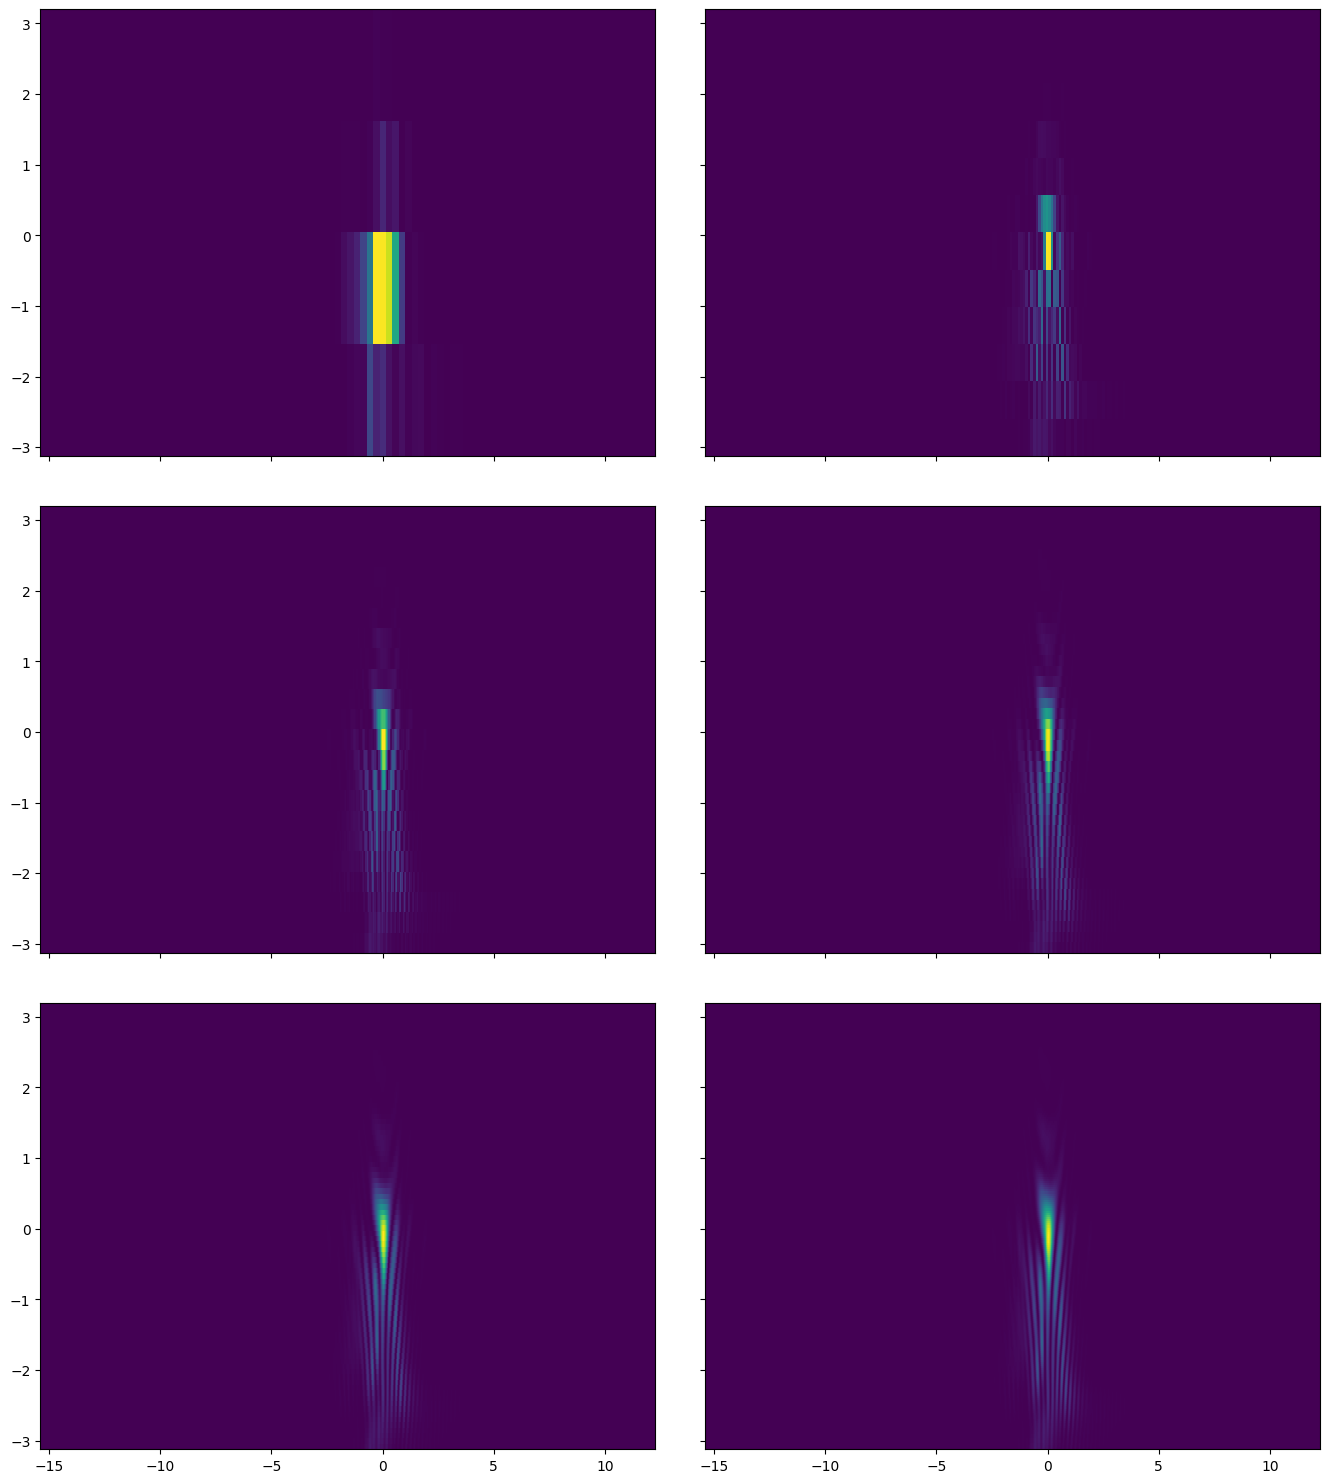

In [4]:
from mpl_toolkits.axes_grid1 import ImageGrid

num_frames = len(w9_image)
ncols = 2
nrows = int(np.ceil(num_frames / ncols))

fig = plt.figure()
grid = ImageGrid(
    fig,
    (1, 2, ncols, nrows),
    nrows_ncols=(nrows, ncols),
    axes_pad=0.5,
    aspect=False,
)

for ax, im in zip(grid, w9_image):
    h_dims = 1e6 * w9.horizontal_extent.get()
    v_dims = 1e6 * w9.vertical_extent.get()
    ax.imshow(
        im, interpolation="nearest", aspect="auto", extent=(*h_dims[:], *v_dims[:])
    )

## Using Run Engine to Generate Spectrum Reports

In this example, we scan the vertical amplitude of the undulator's magnetic field and collect the "Single Electron Spectrum" report from the "Beamline" page of the Sirepo/SRW app. Afterwards, we plot the peaks of the spectra. This section is based on the **ARI** beamline example.

**Hint**: See the [List of predefined simulations in Sirepo](../simulations.rst) for examples of identifiers for different beamlines.



Transient Scan ID: 1     Time: 2023-08-19 17:03:17
Persistent Unique Scan ID: 'f74655bf-9b14-4de9-9c1d-403fc690ed44'
New stream: 'primary'
+-----------+------------+-----------------------------+-----------------------------------+-------------------------------+
|   seq_num |       time | undulator_verticalAmplitude | single_electron_spectrum_duration | single_electron_spectrum_flux |
+-----------+------------+-----------------------------+-----------------------------------+-------------------------------+


|         1 | 17:03:22.2 |                       0.200 |                             4.071 |         11582410813310422.000 |


|         2 | 17:03:26.4 |                       0.400 |                             4.064 |          7511914020931007.000 |


|         3 | 17:03:30.6 |                       0.600 |                             4.062 |          6133644985399308.000 |


|         4 | 17:03:34.8 |                       0.800 |                             4.066 |          5528586337089524.000 |


|         5 | 17:03:39.0 |                       1.000 |                             4.064 |          4389188523218694.000 |


|         6 | 17:03:43.2 |                       1.200 |                             4.069 |          3839228997372156.500 |


+-----------+------------+-----------------------------+-----------------------------------+-------------------------------+
generator scan ['f74655bf'] (scan num: 1)





                                 time  \
seq_num                                 
1       2023-08-19 17:03:22.213392973   
2       2023-08-19 17:03:26.425994635   
3       2023-08-19 17:03:30.637144804   
4       2023-08-19 17:03:34.842891932   
5       2023-08-19 17:03:39.060551643   
6       2023-08-19 17:03:43.279510736   

        single_electron_spectrum_sirepo_data_json  \
seq_num                                             
1                                                   
2                                                   
3                                                   
4                                                   
5                                                   
6                                                   

        single_electron_spectrum_sirepo_data_hash  \
seq_num                                             
1                                                   
2                                                   
3                                 

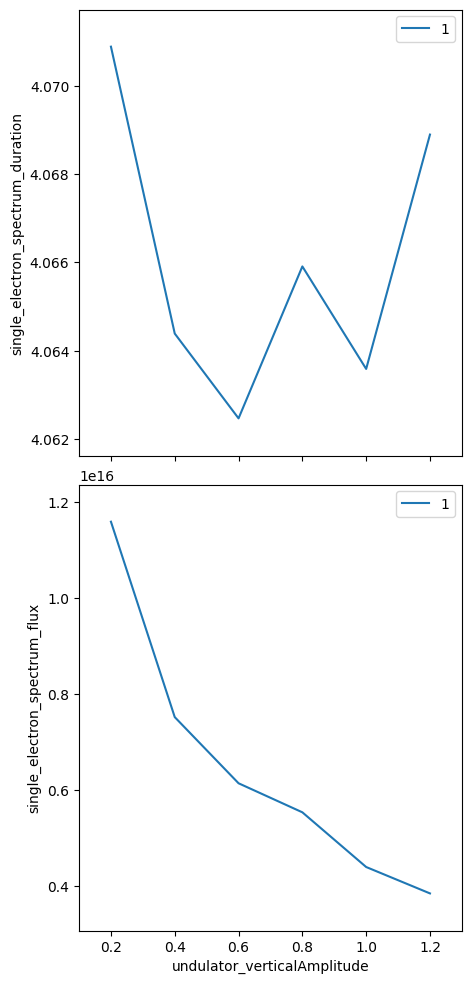

In [5]:
from sirepo_bluesky import prepare_re_env

%run -i $prepare_re_env.__file__

from sirepo_bluesky.sirepo_bluesky import SirepoBluesky
from sirepo_bluesky.sirepo_ophyd import create_classes

connection = SirepoBluesky("http://localhost:8000")

data, schema = connection.auth("srw", sim_id="00000003")
classes, objects = create_classes(
    connection=connection, extra_model_fields=["undulator", "intensityReport"]
)
globals().update(**objects)

undulator.verticalAmplitude.kind = "hinted"
single_electron_spectrum.duration.kind = "hinted"
single_electron_spectrum.flux.kind = "hinted"

single_electron_spectrum.initialEnergy.get()
single_electron_spectrum.initialEnergy.put(20)
single_electron_spectrum.finalEnergy.put(1100)

num_steps = 6

(uid,) = RE(
    bp.scan(
        [single_electron_spectrum],
        undulator.verticalAmplitude,
        0.2,
        1.2,
        num_steps,
    )
)

hdr = db[uid]
tbl = hdr.table()
print(tbl)

ses_data = np.array(list(hdr.data("single_electron_spectrum_image")))
ampl_data = np.array(list(hdr.data("undulator_verticalAmplitude")))

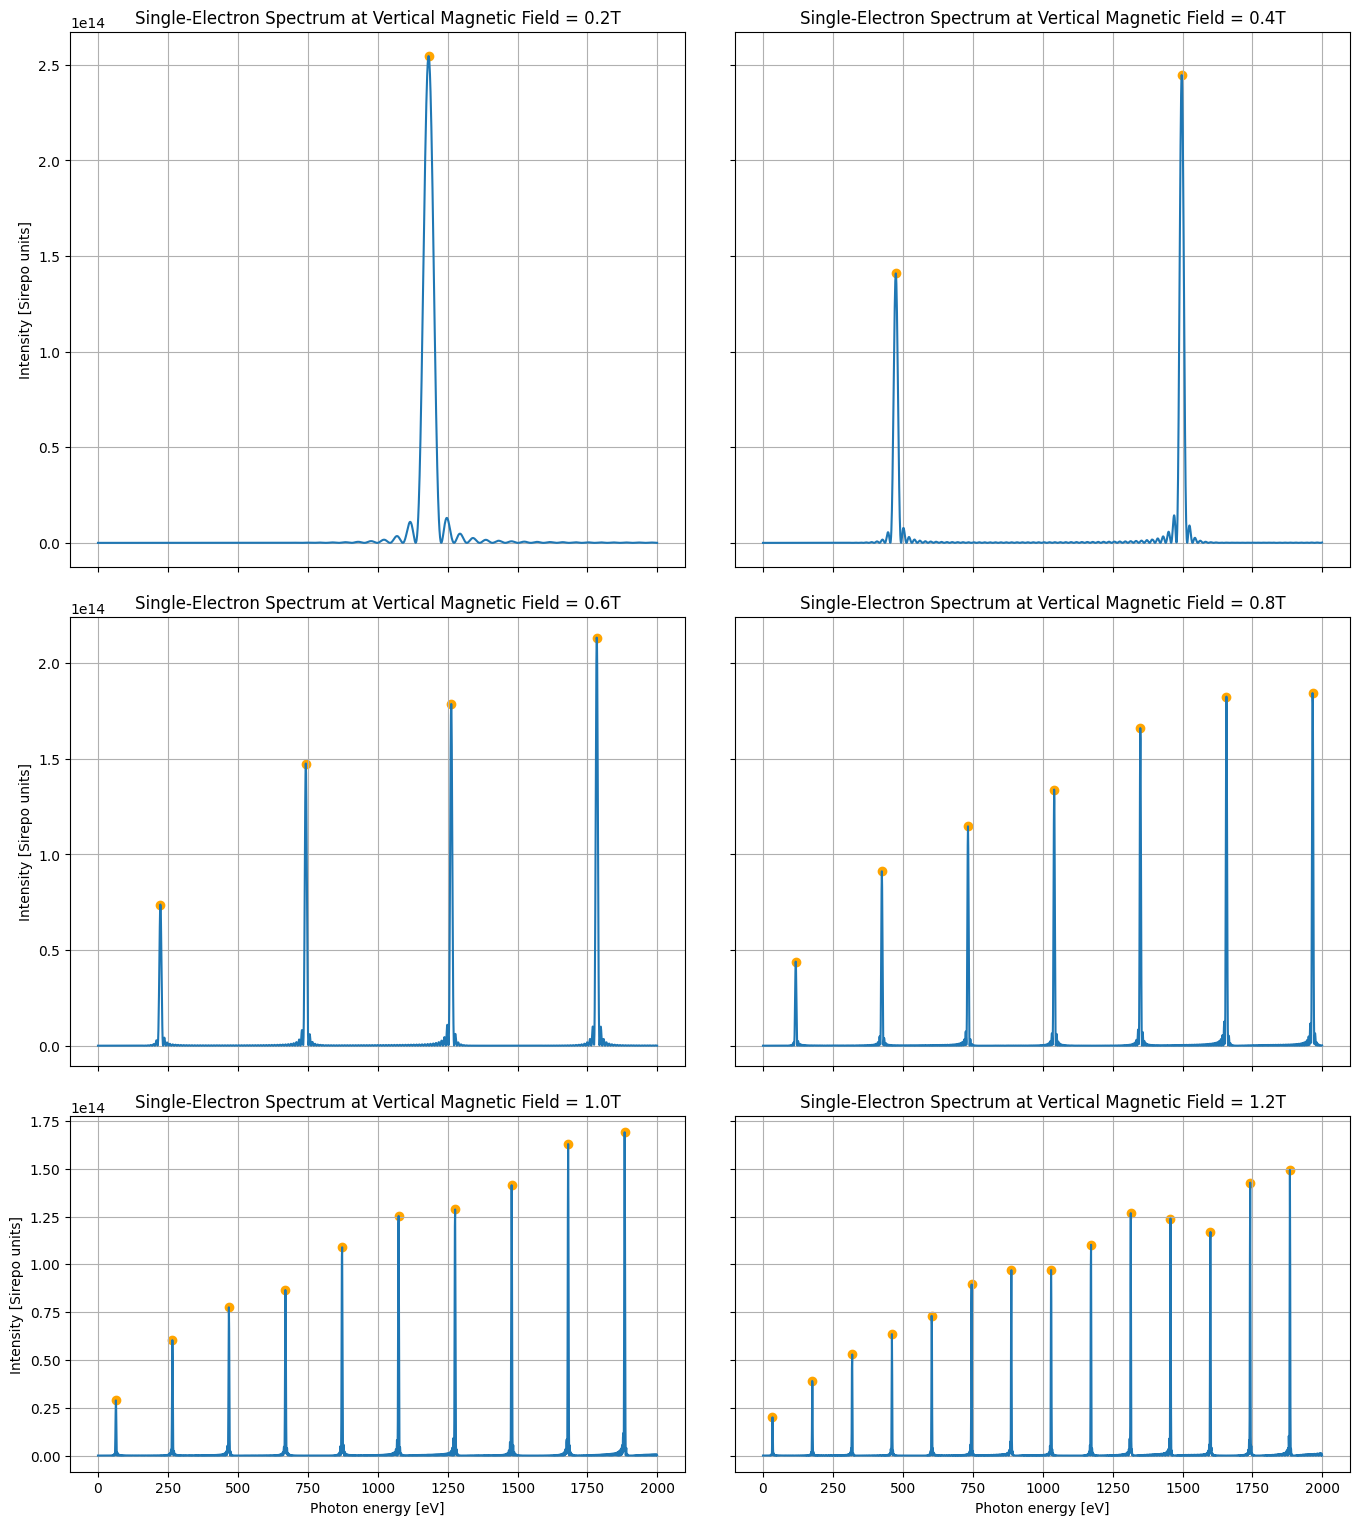

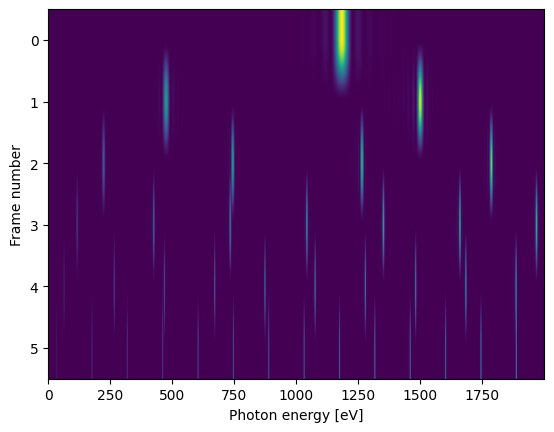

In [6]:
import peakutils
from mpl_toolkits.axes_grid1 import ImageGrid

ncols = 2
nrows = int(np.ceil((num_steps) / ncols))

fig = plt.figure()
grid = ImageGrid(
    fig,
    (1, 2, ncols, nrows),
    nrows_ncols=(nrows, ncols),
    axes_pad=0.5,
    aspect=False,
)

for i in range(num_steps):
    ax = grid[i]
    ax.grid(True)
    ax.plot(ses_data[i, :])
    peak = peakutils.indexes(ses_data[i, :], thres=0.07)
    ax.scatter(peak, ses_data[i, peak], c="orange")
    ax.set_xlabel("Photon energy [eV]")
    ax.set_ylabel("Intensity [Sirepo units]")
    ax.set_title(
        f"Single-Electron Spectrum at Vertical Magnetic Field = {ampl_data[i]:.1f}T"
    )

plt.figure()
plt.xlabel("Photon energy [eV]")
plt.ylabel("Frame number")
plt.imshow(ses_data, aspect="auto")